In [89]:
import numpy as np
import sympy as sp
from scipy.sparse import dok_matrix
from numpy import linalg as la

#PAGERANK Problem 1

def AMAT(name, N):
    with open(name, 'r') as myfile:
        nodes = []
        for line in myfile.readlines()[1:]:
            for node in line.strip().split():
                nodes.append(node)
    m = int(len(nodes)/2)

    nodescopy = sorted(list(set([node.rstrip("\n") for node in nodes])))
    print("nodescopy",nodescopy)
    adj = np.asarray([node.rstrip("\n") for node in nodes]).reshape(m,2)
    print("adj",adj)
    A = dok_matrix((N,N))
    for row in adj:
        i = nodescopy.index(row[0])
        j = nodescopy.index(row[1])
        A[i,j] = A[i,j] + 1
        
    return A

 
A = np.array([[ 0,  0,  0,  0,  0,  0,  0,  1],
          [ 1,  0,  0,  0,  0,  0,  0,  0],
          [ 0,  0,  0,  0,  0,  0,  0,  0],
          [ 1,  0,  1,  0,  0,  0,  1,  0],
          [ 1,  0,  0,  0,  0,  1,  1,  0],
          [ 1,  0,  0,  0,  0,  0,  1,  0],
          [ 1,  0,  0,  0,  0,  0,  0,  0],
          [ 1,  0,  0,  0,  0,  0,  0,  0]])
print(AMAT("matrix.txt", 8) == A)

nodescopy ['0', '1', '2', '3', '4', '5', '6', '7']
adj [['0' '7']
 ['1' '0']
 ['3' '0']
 ['3' '2']
 ['3' '6']
 ['4' '0']
 ['4' '5']
 ['4' '6']
 ['5' '0']
 ['5' '6']
 ['6' '0']
 ['7' '0']]
[[ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]]


In [90]:
#PAGERANK Problem 2
#Note that a node is a sink if its row sum in the adjacency matrix is equal to 0

def KMAT(A):
    A = np.asarray(A)

    sink = np.where(~A.any(axis = 1))
    Am = np.copy(A)
   
    for rowindex in sink:
        Am[rowindex] = np.repeat(1, len(A))
    
    rowsum = np.sum(Am, axis = 1)
    D = rowsum
    K = (Am.T / D)
    
    
    return K

print(KMAT(A))
 

[[ 0.          1.          0.125       0.33333333  0.33333333  0.5         1.
   1.        ]
 [ 0.          0.          0.125       0.          0.          0.          0.
   0.        ]
 [ 0.          0.          0.125       0.33333333  0.          0.          0.
   0.        ]
 [ 0.          0.          0.125       0.          0.          0.          0.
   0.        ]
 [ 0.          0.          0.125       0.          0.          0.          0.
   0.        ]
 [ 0.          0.          0.125       0.          0.33333333  0.          0.
   0.        ]
 [ 0.          0.          0.125       0.33333333  0.33333333  0.5         0.
   0.        ]
 [ 1.          0.          0.125       0.          0.          0.          0.
   0.        ]]


In [91]:
#PAGERANK Problem 3
def steadystate(A, N = None, d = 0.85):
    K = KMAT(A)
    A = np.asarray(A)
    I = np.eye(N)
    p = np.random.choice(5, N)
    p = [float(i)/sum(p) for i in p]
    
    diff = 5
    eps = 1e-10
    
    while diff > eps:
        pold = np.copy(p)
        p = d * K @ p + ((1-d) / N) * np.ones(N)
        diff = (np.absolute(pold - p)).max()
        
    return p

print(steadystate(A, 8))

[ 0.43869288  0.02171029  0.02786154  0.02171029  0.02171029  0.02786154
  0.04585394  0.39459924]


In [92]:
#PAGERANK Problem 4

def dominant(A,N,tol):
    m = A.shape[0]
    n = A.shape[1]
    x = np.random.random((n,1))
    x = x/la.norm(x)
    diff = 1
    k = 0
    while ((diff > tol) & (k < N)):
        xnew = (A @ x)
        xnew = xnew/la.norm(xnew)
        diff = la.norm(xnew - x)
        x = xnew.copy()
        del(xnew)
        k = k + 1

    return x.T @ A @ x, x



def steadystate_eig(A, N = None, d = 0.85):
    K = KMAT(A)
    E = np.ones(N)
    B = d * K + ((1 - d)/N) * E
    p = dominant(B, 1000, 1e-5)[1]
    sump = sum(p)
    p = p/sump
    return p

print(steadystate_eig(A, 8))

[[ 0.43869457]
 [ 0.02171029]
 [ 0.02786154]
 [ 0.02171029]
 [ 0.02171029]
 [ 0.02786154]
 [ 0.04585394]
 [ 0.39459755]]


In [93]:
#PAGERANK Problem 5

def AMAT1(name):
    
    with open(name, 'r') as myfile:
        nodes = []
        for line in myfile.readlines()[1:]:
            for node in line.split(","):
                nodes.append(node)
    
    m = int(len(nodes)/2)
    nodescopy = sorted(list(set([node.rstrip("\n") for node in nodes])))
    adj = np.asarray([node.rstrip("\n") for node in nodes]).reshape(m,2)
    A = np.zeros((len(nodescopy),len(nodescopy)))
    for row in adj:
        i = nodescopy.index(row[0])
        j = nodescopy.index(row[1])
        A[j,i] = 1
    
    ranks = steadystate(A, len(nodescopy), d = 0.7).reshape(len(nodescopy),1)
    nodescopy = np.asarray(nodescopy).reshape(len(nodescopy),1)
    rankmat = np.hstack((nodescopy,ranks))
    rankmat = rankmat[rankmat[:,1].argsort()[::-1]]
    print(rankmat)
    return rankmat

amat = AMAT1("ncaa2013.csv")

[['Duke' '0.009656735782493077']
 ['Butler' '0.008535400729543017']
 ['Louisville' '0.008494955682030719']
 ['Illinois' '0.008332028412173818']
 ['Indiana' '0.008221514638637541']
 ['Miami FL' '0.00814668377659458']
 ['Syracuse' '0.00789188211102955']
 ['Ohio St' '0.007775237826327088']
 ['Michigan St' '0.007618919181072098']
 ['Kansas' '0.007583806473329538']
 ['Minnesota' '0.007511047931821575']
 ['Michigan' '0.007397245584150507']
 ['Georgetown' '0.00739006708180595']
 ['Wisconsin' '0.00687748442602707']
 ['St Louis' '0.006749911054239554']
 ['New Mexico' '0.006671311196418934']
 ['Virginia' '0.006671146749132959']
 ['Marquette' '0.00656021793956054']
 ['Notre Dame' '0.006555148976244562']
 ['NC State' '0.006545229591433438']
 ['VA Commonwealth' '0.00639280128718036']
 ['Oklahoma St' '0.006344746547622161']
 ['Florida' '0.006337529664061449']
 ['Villanova' '0.006324925469192482']
 ['Temple' '0.006305157179583237']
 ['Arizona' '0.006106811224327509']
 ['UNLV' '0.006062641088320836']


In [94]:
#CONDITIONING Problem 1
from scipy import linalg as la
A = np.array([[1,2],[3,4]])
def condition(A):
    sv = la.svdvals(A)
    svmax = max(sv)
    svmin = min(sv)
    if svmin == 0:
        return np.inf
    else:
        K = svmax / svmin
    return K

print("MY ANSWER: ", condition(A))
print("NUMPY'S ANSWER: ", np.linalg.cond(A))

orth = np.array([[1,0],[0,1]])
sing = np.array([[1,0],[0,0]])
print("Orthonormal matrix's condition: ", condition(orth))
print("Singular matrix's condition: ", condition(sing))



MY ANSWER:  14.9330343737
NUMPY'S ANSWER:  14.9330343737
Orthonormal matrix's condition:  1.0
Singular matrix's condition:  inf


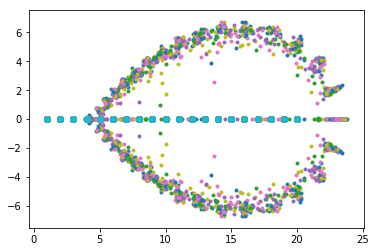

3.59199349772968e+25


In [95]:
#CONDITIONING Problem 2
from matplotlib import pyplot as plt
import sympy as sy

def wilkinson():
    for j in range(100):
        w_roots = np.arange(1,21)
        x,  i = sy.symbols('x i')
        w = sy.poly_from_expr(sy.product(x-i, (i, 1, 20)))[0]
        
        w_coeffs = np.array(w.all_coeffs())
        new_coeffs = np.copy(w_coeffs)
        
        for i in range(len(new_coeffs)):
            new_coeffs[i] = new_coeffs[i] * np.random.normal(1, 10e-10)
            
        h = np.zeros(21)
        h[1]=1e-7

        new_roots = np.roots(new_coeffs)
        w_roots = np.sort(w_roots)
        new_roots = np.sort(new_roots)
        k = la.norm(new_roots - w_roots, np.inf) / la.norm(h, np.inf)

        plt.scatter(new_roots.real, new_roots.imag, marker = '.')
        plt.scatter(w_roots.real, w_roots.imag)

    plt.show()
    return k * la.norm(w_coeffs, np.inf) / la.norm(w_roots, np.inf)
    
print(wilkinson())
    
    

In [96]:
#CONDITIONING Problem 3

def condition_est(A):
    reals = np.random.normal(0, 1e-10, A.shape)
    imags = np.random.normal(0, 1e-10, A.shape)
    H = reals + 1j*imags
    Abar = A + H
    evalues_A = la.eigvals(A)
    evalues_Abar = la.eigvals(Abar)
    K_hat = la.norm(evalues_A - evalues_Abar)/la.norm(H)
    K = la.norm(A)*K_hat/la.norm(evalues_A)
    return K_hat, K

print(condition_est(A))


(0.87707545084808725, 0.89206927971278394)


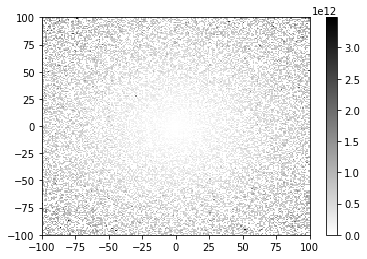

In [97]:
#CONDIITIONING Problem 4
def getmat(x,y):
    A = np.array([[1,x],[y,1]])
    return A

def resolution(xmin, xmax, ymin, ymax, res):
    
    xvec = np.linspace(xmin, xmax, res)
    yvec = np.linspace(ymin, ymax, res)
    zvec = np.zeros((res, res))
    
    for i in range(res): #loop over xvec
        for j in range(res): #loop over yvec
            A = getmat(xvec[i], yvec[j])
            zvec[i,j] = condition_est(A)[1]
    
    plt.pcolormesh(xvec,yvec,zvec, cmap = 'gray_r')
    plt.colorbar()
    plt.show()
        
resolution(-100,100,-100,100,200)

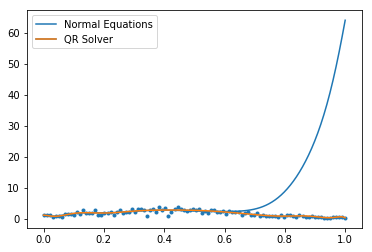

Normal Equations 
 [ -7.66616491e+04   1.48146119e+05   2.47646334e+05  -7.23672014e+05
  -1.39533785e+05   2.01096280e+06  -2.71905138e+06   1.74399461e+06
  -5.49052946e+05   3.52181893e+04   3.07342783e+04  -9.76671206e+03
   1.14167987e+03  -4.28343696e+01   1.27155211e+00]
QR Decomposition 
 [ -9.45621067e+06   6.62579037e+07  -2.08103552e+08   3.86657583e+08
  -4.72212316e+08   3.98175538e+08  -2.36823643e+08   9.96324432e+07
  -2.92403232e+07   5.78803296e+06  -7.24564873e+05   5.05308373e+04
  -1.42447803e+03   1.40662429e+00   1.15251488e+00]
Normal Equations Error:  152.14373083716285
QR Decomposition Error:  4.568370945324403


In [98]:
#CONDIITIONING Problem 5

def coef(n):
    xk, yk = np.load("stability_data.npy").T
    A = np.vander(xk, n+1)    
    xhat = la.inv(A.T @ A) @ A.T @ yk
    
    Q, R = la.qr(A, mode = "economic")
    xhat_qr = la.solve_triangular(R, (Q.T) @ yk)
    
    yhat = np.polyval(xhat, xk)
    yhat_qr = np.polyval(xhat_qr,xk)
    
    plt.scatter(xk,yk, marker = ".")
    p1a, = plt.plot(xk,yhat)
    p1b, = plt.plot(xk,yhat_qr)
    plt.legend([p1a, (p1a,p1b)],["Normal Equations", "QR Solver"])
    plt.show()
    
    error = la.norm(yhat - yk)
    error_qr = la.norm(yhat_qr - yk)
    
    print("Normal Equations",  '\n', xhat)
    print("QR Decomposition",  '\n', xhat_qr)
    print("Normal Equations Error: ", error)
    print("QR Decomposition Error: ", error_qr)

    return

coef(14)

In [99]:
#CONDITIONING Problem 6

def problem6():
    x = sy.symbols("x")
    n = sy.symbols("n")
    
    ans_int_vec = np.zeros((10,1))
    ans_fac_vec = np.zeros((10,1))
    error_fac_vec = np.zeros((10,1))
    
    for n in range(5, 55, 5):
        ans_int = sy.integrate((x**(n))*sy.exp((x-1)), (x,0,1))
        i = int(n/5) - 1
        ans_int_vec[i] = ans_int
                        
    print("ANS_INTEGRATE_VEC: ", '\n', ans_int_vec)
    
    for n in range(5, 55, 5):
        ans_fac = float(((-1)**(n))*sy.subfactorial(n) + ((-1)**(n+1))*sy.factorial(n)/sy.exp(1))
        i = int(n/5) - 1
        ans_fac_vec[i] = ans_fac
        error_fac_vec[i] = float(la.norm(ans_int_vec[i] - ans_fac_vec[i])/la.norm(ans_int_vec[i]))
    
    print("ANS_FACTORIAL_VEC: ", '\n',ans_fac_vec)
    print("ERROR_FACTORIAL_VEC: ", '\n',error_fac_vec)
    
    plt.yscale('log')

    return

problem6()
    

ANS_INTEGRATE_VEC:  
 [[ 0.14553294]
 [ 0.08387707]
 [ 0.05901754]
 [ 0.04554488]
 [ 0.03708621]
 [ 0.03127967]
 [ 0.02704629]
 [ 0.02382273]
 [ 0.02128604]
 [ 0.01923775]]
ANS_FACTORIAL_VEC:  
 [[ 0.14553294]
 [ 0.08387707]
 [ 0.05901754]
 [ 0.04554488]
 [ 0.03708621]
 [ 0.03127967]
 [ 0.02704629]
 [ 0.02382273]
 [ 0.02128604]
 [ 0.01923775]]
ERROR_FACTORIAL_VEC:  
 [[ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]


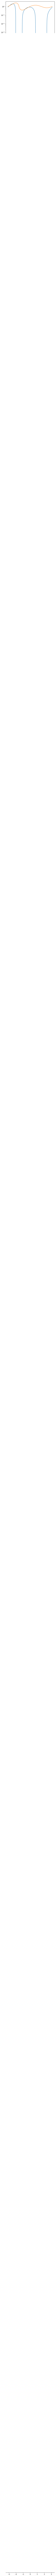

In [100]:
#DIFFERENTIATION Problem 1

import sympy as sy
from matplotlib import pyplot as plt

def f(x):
    return (np.sin(x) + 1)**(np.sin(np.cos(x)))

def derivative(xvec):
    x = sy.symbols("x")
    func = sy.lambdify(x, sy.diff((sy.sin(x) + 1)**(sy.sin(sy.cos(x)))),'numpy') # returns a numpy-ready function
    fvec = np.vectorize(f)
    yvec = fvec(xvec)
    yvecprime = func(xvec)
    return yvec, yvecprime

xvec = np.linspace(-np.pi, np.pi, 1000)
yvec, yvecprime = derivative(xvec)
plt.plot(xvec, yvecprime)
plt.plot(xvec, yvec)
ax = plt.gca()
ax.spines["bottom"].set_position("zero")
ax.plot
plt.show()

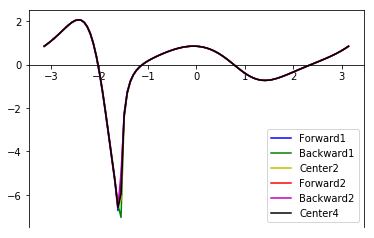

In [101]:
#DIFFERENTIATION Problem 2
import sympy as sy
import numpy as np
from matplotlib import pyplot as plt


h = sy.symbols('h')
x = sy.symbols("x")


def f(x):
    return (sy.sin(x) + 1) ** (sy.sin(sy.cos(x)))
    
def forward1(g, points, h):

    function = sy.lambdify(x, g(x), "numpy")
    fpoints1 = function(points + h)
    fpoints2 = function(points)
    derive = (fpoints1 - fpoints2) / h
    
    return derive

def forward2(g, points, h):
    
    function = sy.lambdify(x, g(x), "numpy")
    fpoints1 = function(points)
    fpoints2 = function(points+h)
    fpoints3 = function(points+ 2*h)
    derive = (-3*fpoints1 + 4*fpoints2 - fpoints3) / (2*h)
    
    return derive

def backward1(g, points, h):
    
    function = sy.lambdify(x, g(x), "numpy")
    fpoints1 = function(points - h)
    fpoints2 = function(points)
    derive = (fpoints2 - fpoints1) / h
    
    return derive

def backward2(g, points, h):
    
    function = sy.lambdify(x, g(x), "numpy")
    fpoints1 = function(points)
    fpoints2 = function(points - h)
    fpoints3 = function(points - 2*h)
    derive = (3*fpoints1 - 4*fpoints2 + fpoints3) / (2*h)
    
    return derive

    
def center2(g, points, h):
    
    function = sy.lambdify(x, g(x), "numpy")
    fpoints1 = function(points + h)
    fpoints2 = function(points - h)
    derive = (fpoints1 - fpoints2) / (2 * h)
    
    return derive

def center4(g, points, h):
    
    function = sy.lambdify(x, g(x), "numpy")
    fpoints1 = function(points - 2*h)
    fpoints2 = function(points - h)
    fpoints3 = function(points + h)
    fpoints4 = function(points + 2*h)
    derive = (fpoints1 - 8*fpoints2 + 8*fpoints3 -fpoints4) / (12 * h)
    
    return derive

points = np.linspace( -np.pi, np.pi, 100)

derivef1 = forward1(f, points, 0.01)
deriveb1 = backward1(f, points, 0.01)
derivec2 = center2(f, points, 0.01)
derivef2 = forward2(f, points, 0.01)
deriveb2 = backward2(f, points, 0.01)
derivec4 = center4(f, points, 0.01)

plt.plot(points, derivef1, 'b', label = 'Forward1')
plt.plot(points, deriveb1, 'g', label = 'Backward1')
plt.plot(points, derivec2, 'y', label = 'Center2')
plt.plot(points, derivef2, 'r', label = 'Forward2')
plt.plot(points, deriveb2, 'm', label = 'Backward2')
plt.plot(points, derivec4, 'k', label = 'Center4')
plt.legend(loc = 'lower right')
ax = plt.gca()
ax.spines["bottom"].set_position("zero")

plt.show()

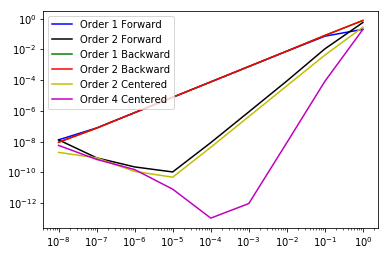

In [102]:
#DIFFERENTIATION Problem 3
x = sy.symbols("x")

def problem3(x):
    hvec = np.logspace(-8,0,9)
    xvec = np.repeat(x,9)
    exact = derivative(xvec)[1]
    errf1 = abs(forward1(f,xvec,hvec)-exact)
    errf2 = abs(forward2(f,xvec,hvec)-exact)
    errb1 = abs(backward1(f,xvec,hvec)-exact)
    errb2 = abs(backward1(f,xvec,hvec)-exact)
    errc2 = abs(center2(f,xvec,hvec)-exact)
    errc4 = abs(center4(f,xvec,hvec)-exact)
    plt.plot(hvec,errf1, 'b', label = 'Order 1 Forward')
    plt.plot(hvec,errf2, 'k', label = 'Order 2 Forward')
    plt.plot(hvec,errb1, 'g', label = 'Order 1 Backward')
    plt.plot(hvec,errb2, 'r', label = 'Order 2 Backward')
    plt.plot(hvec,errc2, 'y', label = 'Order 2 Centered')
    plt.plot(hvec,errc4, 'm', label = 'Order 4 Centered')
    plt.legend(loc = 'upper left')
    plt.loglog()
    plt.show()

    
problem3(1)

In [103]:
def forward(f,alpha,beta,h):
    return (f(alpha+h, beta+h)-f(alpha, beta))/h
def backward(f,alpha,beta,h):
    return (f(alpha, beta)-f(alpha-h, beta-h))/h
def centered(f,alpha,beta,h):
    return (f(alpha+h, beta+h)-f(alpha-h, beta-h))/(2*h)

def xfunc(alpha, beta):
    return alpha*np.tan(beta)/(np.tan(beta)-np.tan(alpha))

def yfunc(alpha, beta):
    return alpha*np.tan(beta)*np.tan(alpha)/(np.tan(beta)-np.tan(alpha))

def problem4():
    plane = np.load("plane.npy")
    print(plane)
    m = len(plane)
    alpha = plane[:,1]
    beta = plane[:,2]
    alpha = np.deg2rad(alpha)
    beta = np.deg2rad(beta)
    xvec = np.zeros((m,1))
    yvec = np.zeros((m,1))
    h = 0.00001
    xvec[0] = forward(xfunc, alpha[0], beta[0], h)
    yvec[0] = forward(yfunc, alpha[0], beta[0], h)

    for i in range(1,m-1):
        xvec[i] = centered(xfunc, alpha[i], beta[i], h)
        yvec[i] = centered(xfunc, alpha[i], beta[i], h)
    
    xvec[m-1] = backward(xfunc, alpha[m-1], beta[m-1], h)
    yvec[m-1] = backward(yfunc, alpha[m-1], beta[m-1], h)

    speed = np.zeros((m,1))
    for i in range(m):
        speed[i] = np.sqrt((xvec[i]**2) + (yvec[i]**2))
        
    return speed

problem4()


[[  7.    56.25  67.54]
 [  8.    55.53  66.57]
 [  9.    54.8   65.59]
 [ 10.    54.06  64.59]
 [ 11.    53.34  63.62]
 [ 12.    52.69  62.74]
 [ 13.    51.94  61.72]
 [ 14.    51.28  60.82]]


array([[ 8.09424127],
       [ 0.03165647],
       [ 0.31016449],
       [ 0.60187847],
       [ 0.89408327],
       [ 1.16632658],
       [ 1.49116613],
       [ 9.20069756]])

In [104]:
#DIFFERENTIATION Problem 5

xyvec = np.array([4,2])

def ftest(xyvec):
    z = np.array([xyvec[0]**2, (xyvec[0]**3) - xyvec[1]])
    return z.T

print(ftest(xyvec))

def jacobian(f, xyvec, h):
    m = len(f(xyvec))
    n = len(xyvec)
    I = np.eye(n)
    jacob = np.zeros((m,n))
    
    for j in range(m):
        I2 = I[:,j]
        sum1 = xyvec + h*I2
        sum2 = xyvec - h*I2
        jacob[:,j] = (f(sum1) - f(sum2))/(2*h)            
        
    return jacob

jacobian(ftest, xyvec, 0.0001)



[16 62]


array([[  8.        ,   0.        ],
       [ 48.00000001,  -1.        ]])

In [105]:
#DIFFERENTIATION Problem 6
import numpy as np
import sympy as sy
from autograd import grad
import autograd.numpy as anp 
from autograd import multigrad
import time

x = sy.symbols("x")

def h(x):
    return sy.log(sy.sqrt(sy.sin(sy.sqrt(x))))

def center2(g, points, h):
    
    function = sy.lambdify(x, g(x), "numpy")
    fpoints1 = function(points + h)
    fpoints2 = function(points - h)
    derive = (fpoints1 - fpoints2) / (2 * h)
    
    return derive

def problem6():
    a = sy.diff(h(x),x)
    b = sy.lambdify(x,a)
    start_time = time.clock()
    c = b(sy.pi/4)
    c_time = time.clock() - start_time
    
    start_time = time.clock()
    g = lambda x: anp.log(anp.sqrt(anp.sin(anp.sqrt(x))))
    
    start_time = time.clock()
    grad_g = grad(g)
    d = grad_g(np.pi/4)
    d_time = time.clock() - start_time
    
    start_time = time.clock()
    e = center2(h, np.pi/4, 1e-5)
    e_time = time.clock() - start_time

    print("Sympy time: ", c_time, "Sympy error: ", 0)
    print("Second Center time: ", e_time,"Second Center error: ", abs(e - c))
    print("Autograd time: ", d_time, "Sympy error: ", abs(d -c ))
    
    return c, d, e

problem6()

Sympy time:  0.0007120000000000459 Sympy error:  0
Second Center time:  0.004273000000004856 Second Center error:  1.38440092723e-11
Autograd time:  0.00029899999999827287 Sympy error:  5.55111512313e-17


(0.2302590111469609, 0.23025901114696085, 0.23025901116080491)

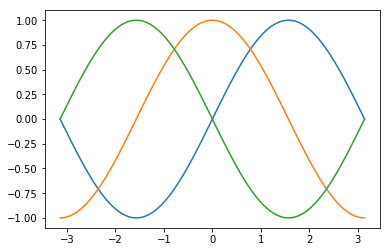

In [106]:
#DIFFERENTIATION Problem 7
from matplotlib import pyplot as plt

def taylor_exp(x, tol= 0.0001):
    result = 0
    cur_term = x
    i = 1
    j = 0
    
    while (anp.abs(cur_term) >= tol):
        cur_term = ((-1)**j)*(x**i)/np.math.factorial(i)
        result += cur_term
        j += 1
        i += 2
        
    return result

def problem7():
    sin_taylor_exp_1 = grad(taylor_exp)
    sin_taylor_exp_2 = grad(grad(taylor_exp))
    xvec = anp.linspace(-anp.pi, anp.pi, 100)
    yvec0 = anp.zeros((len(xvec),1))
    yvec1 = anp.zeros((len(xvec),1))
    yvec2 = anp.zeros((len(xvec),1))
    for i in range(len(xvec)):
        yvec1[i] = sin_taylor_exp_1(xvec[i])
        yvec2[i] = sin_taylor_exp_2(xvec[i])
        yvec0[i] = taylor_exp(xvec[i])
    plt.plot(xvec, yvec0)
    plt.plot(xvec, yvec1)
    plt.plot(xvec, yvec2)
    plt.show()
    return

problem7()

In [115]:
#DIFFERENTIATION Problem 8
from autograd import elementwise_grad
from autograd import jacobian


def problem8():
    k = lambda q : anp.array([anp.exp(q[0])+(q[1]**3), 3*q[1] - anp.cos(q[0])])
    jacobian_k = jacobian(k)
    start_time = time.clock()   
    
    jacob_auto = jacobian_k(anp.array([1.,1.]))
    auto_time = time.clock() - start_time
   
    x = sy.symbols("x")
    z = sy.symbols("z")
    
    function = sy.lambdify(x, g(x), "numpy")
    symat = sy.Matrix([sy.exp(x)*sy.sin(z) + z**3, 3*z - sy.cos(x)])
    jacob_sy = symat.jacobian([x,z]).subs([(x,1),(z,1)])
    
    

    return jacob_auto, jacob_sy

problem8()

(array([[ 2.71828183,  3.        ],
        [ 0.84147098,  3.        ]]), Matrix([
 [E*sin(1), E*cos(1) + 3],
 [  sin(1),            3]]))

In [142]:
#INTEGRATION Problem 1
def integrate1(g, a, b, N, method):
    ans = 0
    if method == "midpoint":
        for i in range(N):
            x = a + ((2*i + 1)*(b-a))/(2*N)
            ans = ans + g(x)
        ans = (b-a)/N * ans
        
    if method == "trapezoid":
        for i in range(1,N):
            x = a + i*(b-a)/N
            ans = ans + g(x)
        x0 = a
        xn = b
        ans = (b-a)/(2*N) * (g(x0) + 2*ans + g(xn))

    if method == "Simpsons":
        odd = 0
        even = 0
        for i in range(1, 2*N):
            if ((i == 1) | (i%2 == 1)) & (i < 2*N):
                x = a + i*(b-a)/(2*N)
                odd = odd + g(x)
            if (i%2 == 0) & (i < 2*N - 1):
                x = a + i*(b-a)/(2*N)
                even = even + g(x)
        x0 = a 
        x2n = b
        ans = (b-a)/(6*N)*(g(x0) + 4*odd + 2*even + g(x2n))
    
    return ans

def g(x):
    return 0.1*(x**4) - 1.5*(x**3) + 0.53*(x**2) + 2*x + 1

integrate1(g, -10, 10, 100, method = "Simpsons")
    

4373.33336

In [ ]:
def f8(x,y):
    z = sy.zeros((2,1))
    z[0] = (sy.exp(x))*sy.sin(y) + y**3
    z[1] = 3*y - sy.cos(x)
    return z




In [119]:
#INTEGRATION Problem 2
from scipy.stats import norm

def newtoncotes(mu, sigma, N, k):
    z = np.linspace(mu - k*sigma, mu + k*sigma, N)
    w = np.zeros((N,1))

    for i in range(1,N-1):
        zmin = (z[i-1] + z[i])/2
        zmax = (z[i] + z[i+1])/2
        w[i] = norm.cdf(zmax,loc = mu, scale = sigma) - norm.cdf(zmin,loc = mu, scale = sigma)
        
    w[0] = norm.cdf((z[0]+z[1])/2,loc = mu, scale = sigma)
    w[N-1] = 1 - norm.cdf((z[N-2]+z[N-1])/2,loc = mu, scale = sigma)
    
    return z,w

newtoncotes(0,1,11,4)
    

(array([-4. , -3.2, -2.4, -1.6, -0.8,  0. ,  0.8,  1.6,  2.4,  3.2,  4. ]),
 array([[  1.59108590e-04],
        [  2.39602174e-03],
        [  2.01950016e-02],
        [  9.23195383e-02],
        [  2.29508588e-01],
        [  3.10843483e-01],
        [  2.29508588e-01],
        [  9.23195383e-02],
        [  2.01950016e-02],
        [  2.39602174e-03],
        [  1.59108590e-04]]))

In [124]:
#INTEGRATION Problem 3
def lognormal(mu, sigma, N, k):
    z = newtoncotes(mu, sigma, N, k)[0]
    A = np.exp(z)
    z = np.log(A)
    w = np.zeros((N,1))

    for i in range(1,N-1):
        zmin = (z[i-1] + z[i])/2
        zmax = (z[i] + z[i+1])/2
        w[i] = norm.cdf(zmax,loc = mu, scale = sigma) - norm.cdf(zmin,loc = mu, scale = sigma)

    w[0] = norm.cdf((z[0]+z[1])/2,loc = mu, scale = sigma)
    w[N-1] = 1 - norm.cdf((z[N-2]+z[N-1])/2,loc = mu, scale = sigma)
    
    return z,w

lognormal(0,1,11,4)

(array([-4. , -3.2, -2.4, -1.6, -0.8,  0. ,  0.8,  1.6,  2.4,  3.2,  4. ]),
 array([[  1.59108590e-04],
        [  2.39602174e-03],
        [  2.01950016e-02],
        [  9.23195383e-02],
        [  2.29508588e-01],
        [  3.10843483e-01],
        [  2.29508588e-01],
        [  9.23195383e-02],
        [  2.01950016e-02],
        [  2.39602174e-03],
        [  1.59108590e-04]]))

In [137]:
#INTEGRATION Problem 4
def expectedincome(mu, sigma, N, k):
    z, w = lognormal(mu, sigma, N, k)
    z = np.exp(z)
    return np.dot(z,w)

print("My Approximation: ", expectedincome(mu = 10.5, sigma = 0.8, N = 1000, k = 4))
print("Exact Value: ", np.exp(10.5 + (0.8**2)/2))
    

My Approximation:  [ 50005.03168291]
Exact Value:  50011.0870085


In [139]:
#INTEGRATION Problem 5
x1 = 0
x2 = np.sqrt(3/5*1.0)
x3 = -np.sqrt(3/5*1.0)
w1 = 8/9*1.0
w2 = 5/9*1.0
w3 = 5/9*1.0

def g(x):
    return 0.1*(x**4) - 1.5*(x**3) + 0.53*(x**2) + 2*x + 1

def gaussquad(g,a,b):
    return (b-a)/2 * ((w1*g((b-a)/2*x1 + (a+b)/2)) + (w2*g((b-a)/2*x2 + (a+b)/2) + (a+b)/2) + (w3*g((b-a)/2*x3 + (a+b)/2)))

print("Gaussian Quadrature: ", gaussquad(g,-10,10))

4373.33333333


In [144]:
#INTEGRATION Problem 6
from scipy import integrate
print(integrate.quad(g, -10,10)[0])

4373.333333333334


In [162]:
#INTEGRATION Problem 7
#let omega be a 1x2 array [a,b]
def g1(x1,y1):
    if ((x1**2) + (y1**2) <= 1):
        return 1
    else:
        return 0

omega = np.array([-1,1])
def montecarlo(g, omega, N):
    a = omega[0]
    b = omega[1]
    
    xy = np.random.rand(N,2)*(b-a) - 1
    summed = 0
    for i in range(N):
        summed = summed + g(xy[i,0], xy[i,1])
        
    pi = (4/N)*summed
    
    return pi

n = 1000
delta = 5
while (delta != 0):
    estimate = montecarlo(g1, omega, n)
    delta = round(estimate, 5) - 3.1415
    n = n + 1
print(estimate)
print("Smallest number of draws: ", n)

3.141502370851011
Smallest number of draws:  4008


In [192]:
#INTEGRATION Problem 8

def prime(i, primes):
    for prime in primes:
        if not (i == prime or i % prime):
            return False
    primes.add(i)
    return i

def primegen(n):
    primes = set([2])
    i, p = 2, 0
    while True:
        if prime(i, primes):
            p += 1
            if p == n:
                return np.array(list(primes))
        i += 1

print(primegen(4))
def nthelement(name, N, d):
    primes = primegen(d)
    if name == "Weyl":
        weyl = np.zeros((d,1))
        for i in range(d):
            weyl[i] = N*(primes[i]**0.5)
        return weyl
    
    if name == "Haber":
        haber = np.zeros((d,1))
        for i in range(d):
            haber[i] = N*(N+1)/2*(primes[i]**0.5)
        return haber
    
    if name == "Niederreiter":
        niederreiter = np.zeros((d,1))
        for i in range(0,d):
            niederreiter[i] = N*(2**(i+1/(N+1)))
        return niederreiter
    
    if name == "Baker":
        baker = np.zeros((d,1))
        for i in range(d):
            baker[i] = N*np.exp(primes[i])
        return baker

nthelement("Niederreiter", 1000, 5, 10)[1]

[2 3 5 7]


TypeError: nthelement() takes 3 positional arguments but 4 were given

In [198]:
#INTEGRATION Problem 8

def prime(i, primes):
    for prime in primes:
        if not (i == prime or i % prime):
            return False
    primes.add(i)
    return i

def primegen(n):
    primes = set([2])
    i, p = 2, 0
    while True:
        if prime(i, primes):
            p += 1
            if p == n:
                return np.array(list(primes))
        i += 1

print(primegen(4))
def nthelement(name, N, d):
    primes = primegen(d)
    if name == "Weyl":
        weyl = N*(primes**0.5)
        weyl = weyl - np.floor(weyl)
        return weyl
    
    if name == "Haber":
        haber = N*(N+1)/2*(primes**0.5)
        haber = haber - np.floor(haber)
        return haber
    
    if name == "Niederreiter":
        niederreiter = np.zeros((d,1))
        for i in range(0,d):
            niederreiter[i] = N*(2**((i+1)/(N+1)))
        niederreiter = niederreiter - np.floor(niederreiter)
        return niederreiter
    
    if name == "Baker":
        baker = N*np.exp(primes)
        baker = baker - np.floor(baker)
        return baker

nthelement("Niederreiter", 5, 2) #5th array in niederreiter sequence

[2 3 5 7]


array([[ 0.61231024],
       [ 0.29960525]])

In [207]:
#INTEGRATION Problem 9
#let omega be a 1x2 array [a,b]
def g1(x1,y1):
    if ((x1**2) + (y1**2) <= 1):
        return 1
    else:
        return 0

omega = np.array([-1,1])
def piapprox(g, omega, name, n):
    a = omega[0]
    b = omega[1]
    delta = 5 
    summed = 0
    for i in range(n):
        xy = nthelement(name, i, 2)
        summed = summed + g(xy[0], xy[1])
    pi2 = (4/n)*summed
    
    return pi2

n = 1
delta = 5
while (delta != 0):
    estimate = piapprox(g, omega, "Weyl", n)
    delta = round(estimate, 5) - 3.1415
    n = n + 1
print(estimate)
print("Smallest number of draws: ", n)

3.1414982164090364
Smallest number of draws:  1683


In [285]:
#SIMPLEX Problems 1, 2, 3

A = np.array([[1,-1],[3,1],[4,3]])
b = np.array([2,5,7])
c = np.array([3,2])

class linear():
    def __init__(self, A, b, c):
        x = np.zeros((len(c),1))
        if (A@x <= b).all():
            self.A = A
            self.b = b.reshape(len(b),1)
            self.c = c.reshape(len(c),1)
        else:
            raise ValueError("Not feasible at origin.")
            
    def indexlist():
        m,n = A.shape
        length = m + n
        L = np.zeros(length, 1)
        for i in range(m): #m is the number of inequality constraints
            L[i] = m - 2 + i + 1 #subtract 2 for the positivity constraints, add 1 to start at 1 
        for i in range(m,length):
            L[i] = i - m #store decision variables
        #assume we have xvec which stores current guesses
        

    def tableau(self):
        m,n = self.A.shape
        I = np.eye(m)
        zero = np.array([[0]])
        one = np.array([[1]])
        zerovec = np.zeros((m,1))
        negct = -self.c.T
        zerovect = zerovec.T
        table1 = np.hstack((zero, negct, zerovect, one))
        table2 = np.hstack((self.b, self.A, I, zerovec))
        table = np.vstack((table1,table2))
        return table
    
    def pivot(self):
        table = self.tableau()
        enterindex = np.argmax(table[0, 1:] < 0) 
        ratios = np.zeros((len(table), 1))
        for i in range(1, len(table)):
            ratios[i] = table[i, 0] / table[i, enterindex + 1]
        ratios = ratios[1:len(ratios)]
        leaveindex = np.argmin(ratios) + 2
        
        pivotrow = leaveindex
        pivotcolumn = enterindex + 2
        
        return pivotrow,pivotcolumn
    
    def fullpivot(self):
        boundedbool = self.tableau()[pivotcolumn - 1] > 0
        if boundedbool != 
opt1 = linear(A, b, c)
opt1.tableau()
opt1.pivot()

(3, 2)